In [156]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import functions as f 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
%config InlineBackend.figure_format='retina'



In [2]:
blue = sns.color_palette()[0]

In [3]:
df = pd.read_pickle('data/rent_regression_done.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 73 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   obid                              int64         
 1   mietekalt                         float64       
 2   nebenkosten                       float64       
 3   heizkosten                        float64       
 4   baujahr                           float64       
 5   letzte_modernisierung             float64       
 6   wohnflaeche                       float64       
 7   nutzflaeche                       float64       
 8   etage                             float64       
 9   anzahletagen                      float64       
 10  zimmeranzahl                      float64       
 11  schlafzimmer                      float64       
 12  badezimmer                        float64       
 13  ev_kennwert                       float64       
 14  laufzeittage      

In [5]:
columns = ['mietekalt', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'aufzug', 'balkon',
       'einbaukueche', 'ev_wwenthalten', 'foerderung', 'gaestewc', 'garten',
       'heizkosten_in_wm_enthalten', 'keller', 'parkplatz', 'rollstuhlgerecht',
       'ausstattung', 'energieausweistyp',
       'haustier_erlaubt', 'heizungsart', 'kategorie_Wohnung', 'objektzustand',
       'anbieter', 'rent_sqm',
       'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie', 'Koks',
       'kombinierte erneuerbare Energie', 'Erdwärme', 'Bioenergie',
       'Wasserenergie', 'Nahwärme', 'Fernwärme', 'Holzschnitzel', 'Öl',
       'kombinierte regenerative Energie', 'Kohle',
       'kombinierte Fossilkraftstoffe', 'Gas', 'Holz', 'Heizdampf-Fernwärme',
       'thermische Umweltenergie', 'Flüssiggas', 'kombinierte Bio Energie',
       'Elektro']

In [6]:
clustering_df = df[columns]

In [7]:
clustering_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 51 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   mietekalt                         2651885 non-null  float64
 1   baujahr                           2651885 non-null  float64
 2   wohnflaeche                       2651885 non-null  float64
 3   zimmeranzahl                      2651885 non-null  float64
 4   schlafzimmer                      2651885 non-null  float64
 5   badezimmer                        2651885 non-null  float64
 6   aufzug                            2651885 non-null  bool   
 7   balkon                            2651885 non-null  bool   
 8   einbaukueche                      2651885 non-null  bool   
 9   ev_wwenthalten                    2651885 non-null  bool   
 10  foerderung                        2651885 non-null  bool   
 11  gaestewc                          265

In [8]:
clustering_df.ausstattung.value_counts(dropna=False)

NaN        1550469
Normal      523163
Gehoben     505691
Luxus        54878
Einfach      17684
Name: ausstattung, dtype: int64

In [9]:
X, _ = f.clean_data(clustering_df)

In [10]:
X.columns

Index(['mietekalt', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer',
       'badezimmer', 'aufzug', 'balkon', 'einbaukueche', 'ev_wwenthalten',
       'foerderung', 'gaestewc', 'garten', 'heizkosten_in_wm_enthalten',
       'keller', 'parkplatz', 'rollstuhlgerecht', 'haustier_erlaubt',
       'rent_sqm', 'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie', 'Koks',
       'kombinierte erneuerbare Energie', 'Erdwärme', 'Bioenergie',
       'Wasserenergie', 'Nahwärme', 'Fernwärme', 'Holzschnitzel', 'Öl',
       'kombinierte regenerative Energie', 'Kohle',
       'kombinierte Fossilkraftstoffe', 'Gas', 'Holz', 'Heizdampf-Fernwärme',
       'thermische Umweltenergie', 'Flüssiggas', 'kombinierte Bio Energie',
       'Elektro', 'ausstattung_Einfach', 'ausstattung_Gehoben',
       'ausstattung_Luxus', 'ausstattung_Normal', 'ausstattung_nan',
       'energieausweistyp_Endenergiebedarf',
       'energieausweistyp_Energiev

### Principal Component Analysis 

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
normalizer = Normalizer()
normalized_values = normalizer.fit_transform(X)

In [13]:
normalized_values

array([[1.91853316e-01, 9.80911567e-01, 3.14836210e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.91931578e-04],
       [2.03653033e-01, 9.78516020e-01, 3.18974630e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.90730201e-04],
       [2.33906329e-01, 9.71685876e-01, 3.31367300e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.87304853e-04],
       ...,
       [6.54435046e-01, 7.55031062e-01, 4.00140285e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.64901422e-01, 7.45797762e-01, 4.06328647e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.74435451e-01, 7.36633387e-01, 3.22230271e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
%%time
from sklearn.decomposition import PCA

# One less as original feature number
N_COMPONENTS = clustering_df.shape[1] - 1


pca = PCA(n_components=N_COMPONENTS)
pca.fit(normalized_values)

print('explained_variance_ratio_ vector:', pca.explained_variance_ratio_)
print('explained_variance_ratio_ sum:', pca.explained_variance_ratio_.sum())



explained_variance_ratio_ vector: [9.40622517e-01 4.04294359e-02 8.12560557e-03 7.72981934e-03
 3.01232920e-03 2.09696830e-05 8.46012403e-06 7.73228086e-06
 4.33585861e-06 3.93336387e-06 3.59292130e-06 2.91454883e-06
 2.28173290e-06 2.14726947e-06 1.97128382e-06 1.84685228e-06
 1.74242700e-06 1.64745644e-06 1.43515980e-06 1.30718603e-06
 1.28104582e-06 1.22812742e-06 1.09486563e-06 1.06582623e-06
 1.00653666e-06 9.07771669e-07 7.43896081e-07 7.31837879e-07
 6.67917920e-07 6.23185531e-07 5.60980355e-07 4.64819031e-07
 4.02306200e-07 3.78968198e-07 2.80519367e-07 2.25893053e-07
 2.20071392e-07 2.05639239e-07 1.88819752e-07 1.78714528e-07
 1.75589287e-07 1.61536799e-07 1.44782946e-07 1.37328002e-07
 1.15895286e-07 9.61721502e-08 9.00607216e-08 7.79679730e-08
 6.65846574e-08 5.66635544e-08]
explained_variance_ratio_ sum: 0.9999996057981001
CPU times: user 1min 26s, sys: 44.4 s, total: 2min 10s
Wall time: 46.5 s


In [15]:
s = pd.DataFrame(pca.singular_values_)
v = pd.DataFrame(pca.components_)

In [16]:
f.explained_variance(s, 1)

0.9406228881125894

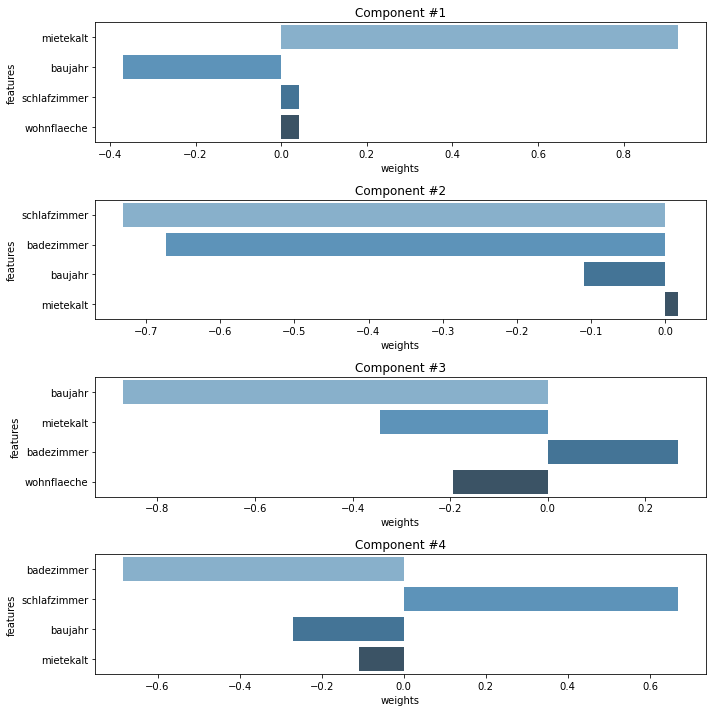

In [17]:
figure = plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(4,1,i+1)
    f.display_components(v, clustering_df.columns, i, n_weights=4)
    plt.title('Component #{}'.format(i+1))
figure.tight_layout()

    

## Setup K-Means
Create K-Means analysis to find groups in customers based only on customer features

### Create input data based on PCA analysis
Use the `pca.transform()` function to create input data for the K-Means analysis.

In [18]:
%%time
# Create input data from PCA Analysis
pca_transformed = pca.fit_transform(normalized_values)

pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed = pca_transformed.iloc[:,:1]
PCA_list=['c_1']
pca_transformed.columns=PCA_list

pca_transformed.head()



CPU times: user 1min 26s, sys: 44.5 s, total: 2min 10s
Wall time: 46.4 s


,c_1
0,-0.098635
1,-0.086798
2,-0.056189
3,-0.056189
4,-0.098544


In [19]:
%%time
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Do a loop over different k's to find the optimum
inertias = []
distortions = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i).fit(pca_transformed)
    cluster_centers = kmeans.cluster_centers_
    inertias.append(kmeans.inertia_)
    
    distortions.append(sum(np.min(cdist(pca_transformed, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / pca_transformed.shape[0])
                                        
    inertias.append(kmeans.inertia_)
    

CPU times: user 5min 25s, sys: 1min 10s, total: 6min 35s
Wall time: 59.7 s


In [20]:
distortions

[0.11603516478106868,
 0.06514890479147127,
 0.0446385876266985,
 0.03460381341906593,
 0.02854335078288242,
 0.02404328115002803]

<AxesSubplot:>

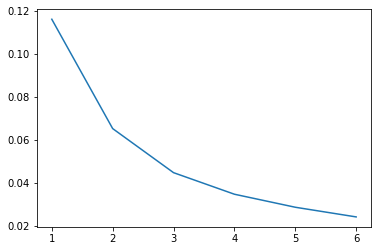

In [21]:
sns.lineplot(x=range(1,7), y=distortions)

In [22]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(pca_transformed)
labels = kmeans.labels_

CPU times: user 1min 21s, sys: 15.3 s, total: 1min 36s
Wall time: 13.8 s


In [23]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns=pca_transformed.columns)


Text(0.5, 1.0, 'Attribute Value by Centroid')

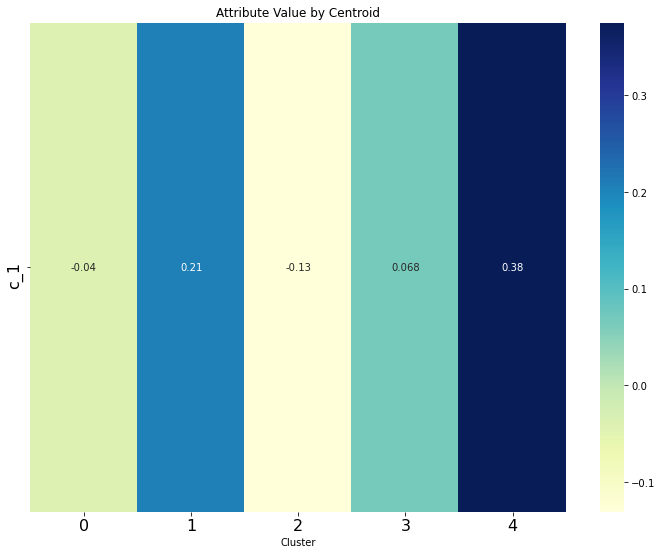

In [24]:
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_df.T, cmap = 'YlGnBu', annot=True)
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")



In [25]:
df.loc[:, 'label'] = labels

In [32]:
ticks = [0, 3, 4, 1, 2]
label_mapping = {4:'very high priced', 1:'high priced', 3:'normal priced', 0:'low priced', 2:'very low priced'}
df.label = df.label.map(label_mapping)

In [33]:
city_count = df.groupby(['City', 'year']).label.value_counts(normalize=True).reset_index(name='label_ratio')
wohnflaeche = df.groupby(['City', 'year', 'label']).wohnflaeche.mean().reset_index(name='wohnflaeche_mean')
baujahr = df.groupby(['City', 'year', 'label']).baujahr.mean().reset_index(name='baujahr_mean')
rent_sqm = df.groupby(['City', 'year', 'label']).rent_sqm.mean().reset_index(name='rent_sqm_mean')
miete_mean = df.groupby(['City', 'year', 'label']).mietekalt.mean().reset_index(name='mietekalt_mean')
laufzeittage = df.groupby(['City', 'year', 'label']).laufzeittage.mean().reset_index(name='laufzeittage_mean')
anzahletagen = df.groupby(['City', 'year', 'label']).anzahletagen.mean().reset_index(name='anzahletagen_mean')
zimmeranzahl = df.groupby(['City', 'year', 'label']).zimmeranzahl.mean().reset_index(name='zimmeranzahl_mean')
schlafzimmer = df.groupby(['City', 'year', 'label']).schlafzimmer.mean().reset_index(name='schlafzimmer_mean')


summary =miete_mean.merge(wohnflaeche, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(baujahr, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(rent_sqm, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(laufzeittage, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(anzahletagen, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(zimmeranzahl, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(schlafzimmer, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(city_count, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label'])







In [34]:
summary.head()

,City,year,label,mietekalt_mean,wohnflaeche_mean,baujahr_mean,rent_sqm_mean,laufzeittage_mean,anzahletagen_mean,zimmeranzahl_mean,schlafzimmer_mean,label_ratio
0,Berlin,2007,high priced,1038.270473,122.695405,1942.651261,8.611594,34.925676,-29.880912,3.595861,-36.964527,0.023754
1,Berlin,2007,low priced,494.391148,84.823483,1950.969772,6.010346,37.250390,-35.603024,2.898726,-50.202463,0.257438
2,Berlin,2007,normal priced,724.522170,104.760582,1943.763974,7.130929,35.246601,-28.067016,3.321130,-42.750298,0.084121
3,Berlin,2007,very high priced,1383.297322,134.269563,1945.220420,10.394178,40.147541,-30.306011,3.800546,-31.825137,0.003671
4,Berlin,2007,very low priced,304.555096,59.699673,1950.506717,5.245547,32.332146,-43.859854,2.122396,-67.006454,0.631016


<AxesSubplot:xlabel='mietekalt_mean', ylabel='wohnflaeche_mean'>

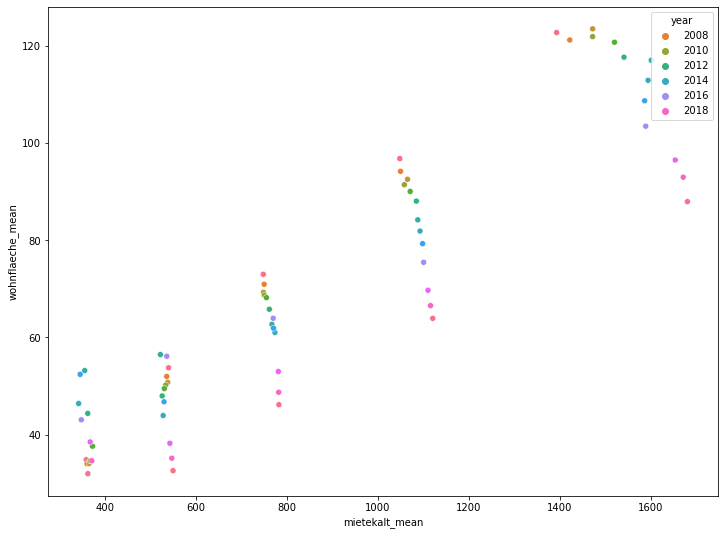

In [35]:
plt.figure(figsize=(12,9))


sns.scatterplot(data=summary.query('City == "München" '), x='mietekalt_mean', y='wohnflaeche_mean', hue='year', palette='husl')

In [36]:
summary.head()

,City,year,label,mietekalt_mean,wohnflaeche_mean,baujahr_mean,rent_sqm_mean,laufzeittage_mean,anzahletagen_mean,zimmeranzahl_mean,schlafzimmer_mean,label_ratio
0,Berlin,2007,high priced,1038.270473,122.695405,1942.651261,8.611594,34.925676,-29.880912,3.595861,-36.964527,0.023754
1,Berlin,2007,low priced,494.391148,84.823483,1950.969772,6.010346,37.250390,-35.603024,2.898726,-50.202463,0.257438
2,Berlin,2007,normal priced,724.522170,104.760582,1943.763974,7.130929,35.246601,-28.067016,3.321130,-42.750298,0.084121
3,Berlin,2007,very high priced,1383.297322,134.269563,1945.220420,10.394178,40.147541,-30.306011,3.800546,-31.825137,0.003671
4,Berlin,2007,very low priced,304.555096,59.699673,1950.506717,5.245547,32.332146,-43.859854,2.122396,-67.006454,0.631016


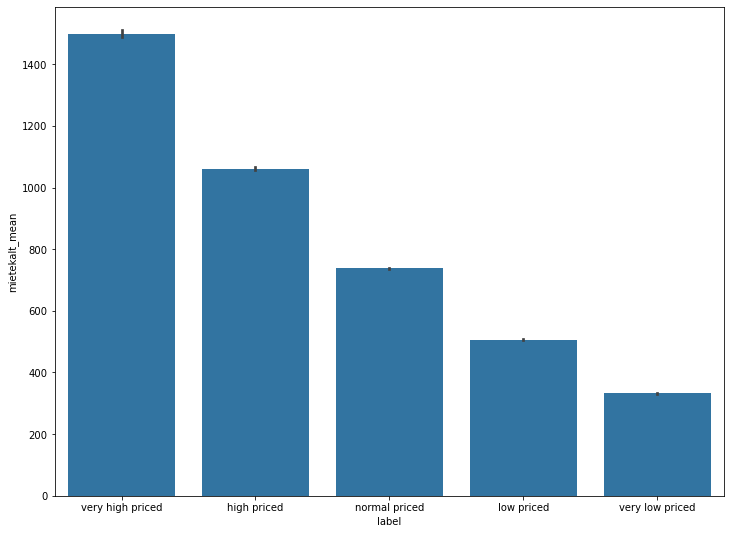

In [37]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='mietekalt_mean', order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);


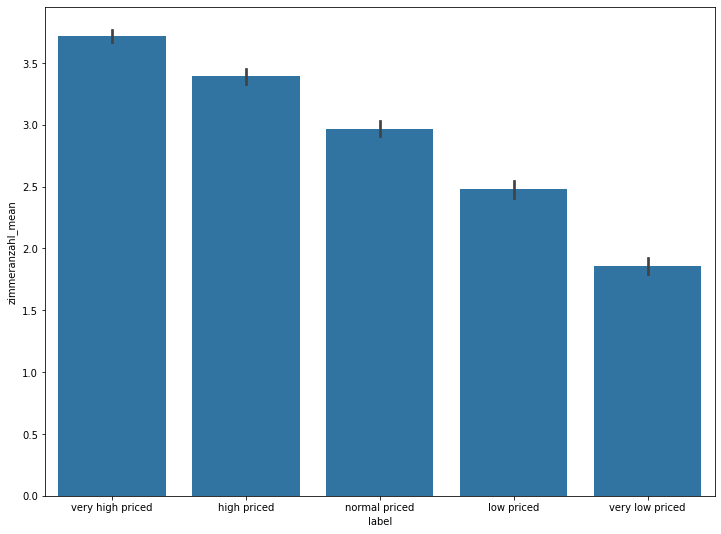

In [38]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='zimmeranzahl_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);



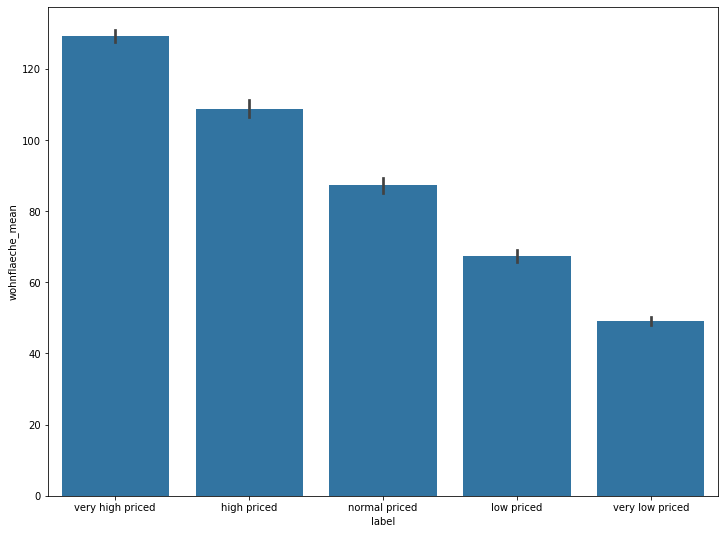

In [39]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='wohnflaeche_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);



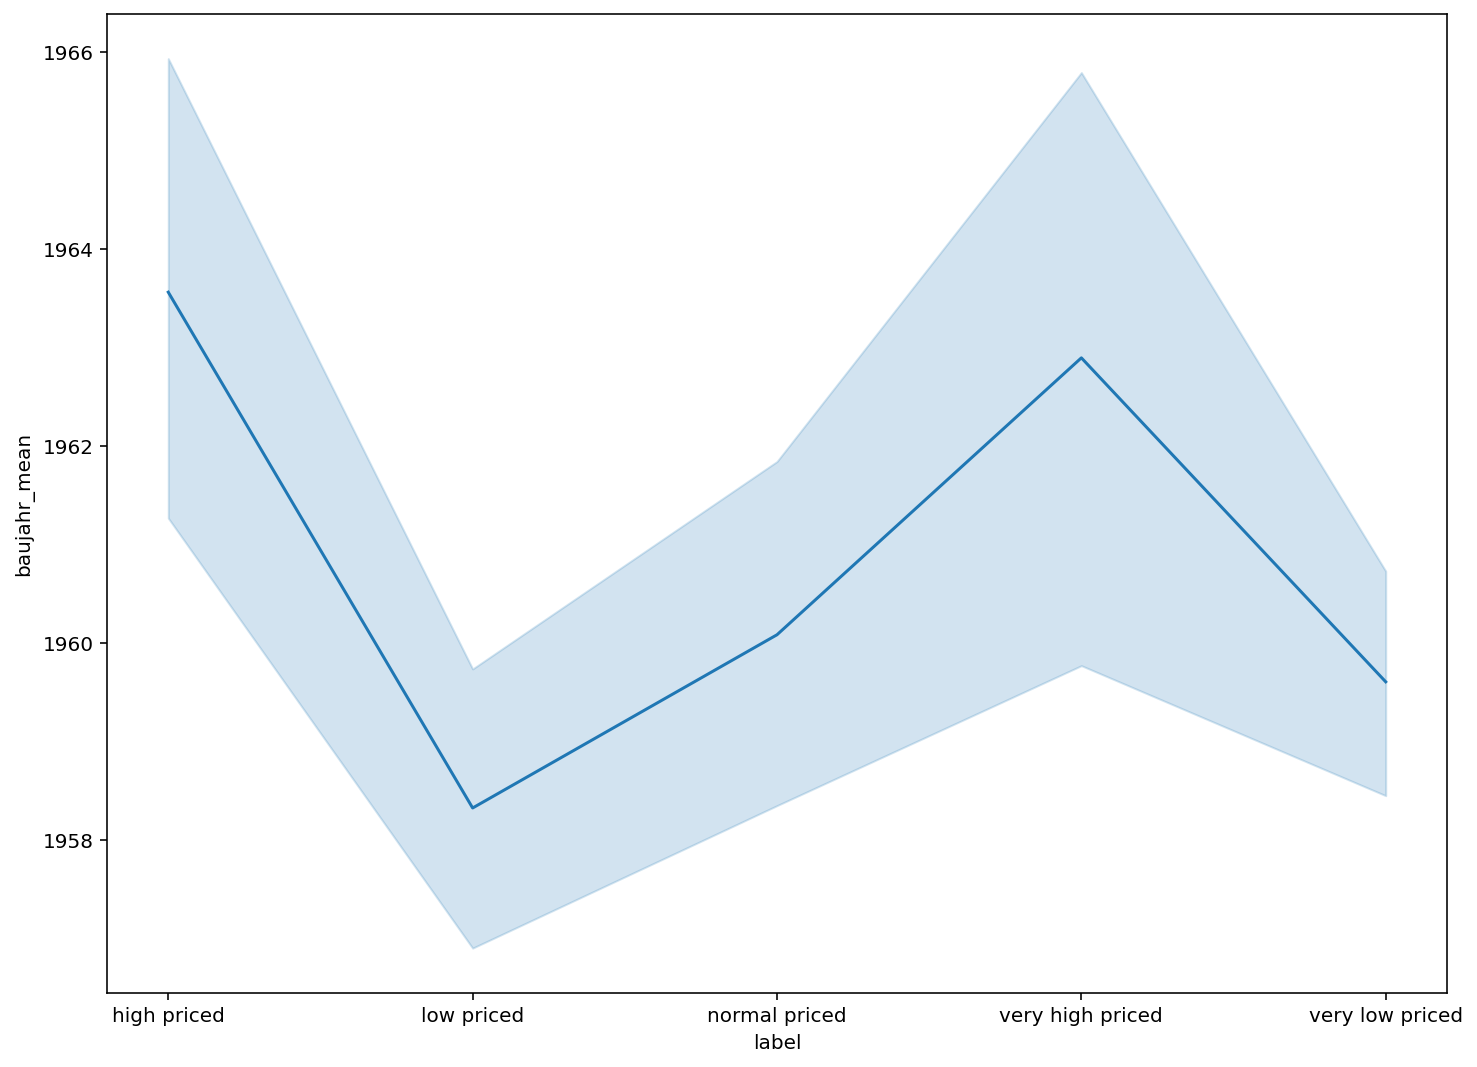

In [177]:
plt.figure(figsize=(12, 9))
sns.lineplot(data=summary, x='label', y='baujahr_mean');



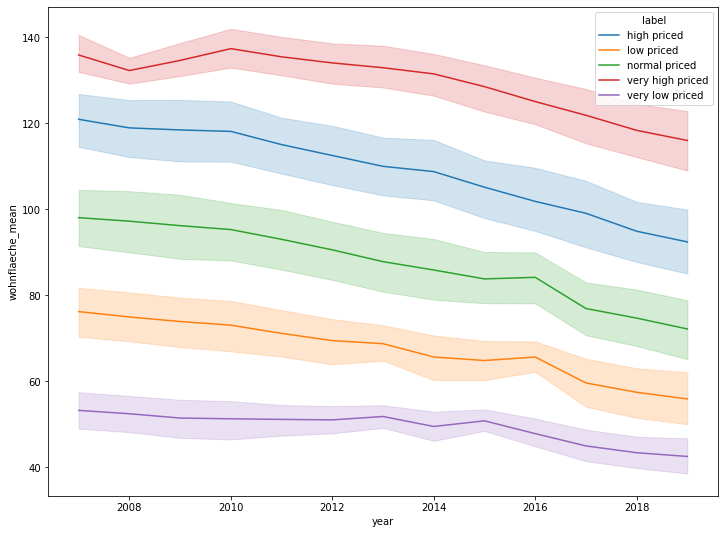

In [40]:
plt.figure(figsize=(12, 9))
sns.lineplot(data=summary, x='year', y='wohnflaeche_mean', hue='label');
#plt.legend(labels=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])

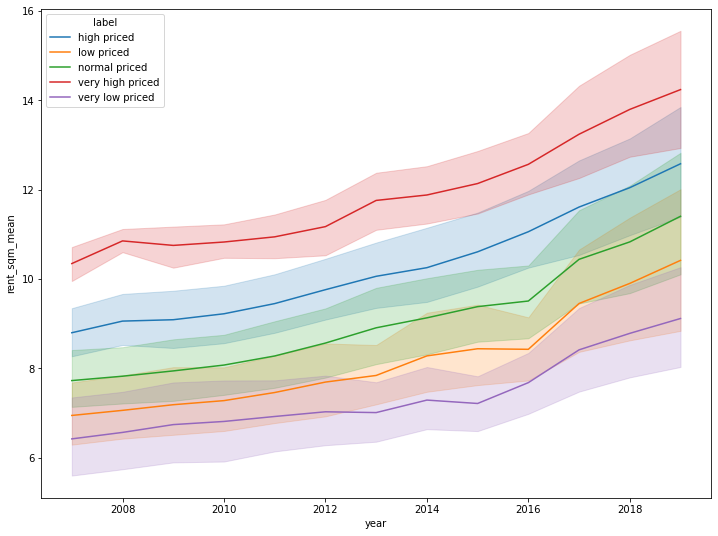

In [81]:
plt.figure(figsize=(12, 9))
sns.lineplot(data=summary, x='year', y='rent_sqm_mean', hue='label');
#plt.legend(labels=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])

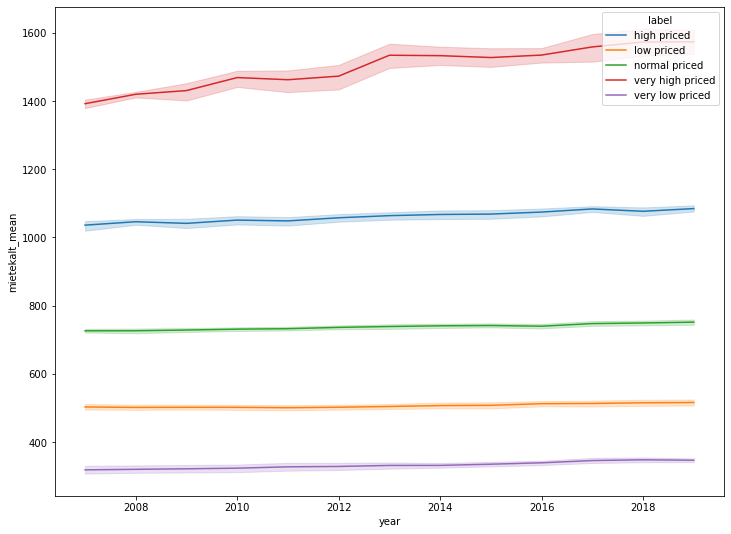

In [41]:
plt.figure(figsize=(12, 9))
sns.lineplot(data=summary, x='year', y='mietekalt_mean', hue='label');
#plt.legend(labels=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])

In [42]:
labels = summary.label.unique()
labels

array(['high priced', 'low priced', 'normal priced', 'very high priced',
       'very low priced'], dtype=object)

In [43]:
changes = pd.DataFrame()

for label in labels:
    df = summary.query('label == @label').pivot(index='City', columns='year', values='rent_sqm_mean').fillna(method = 'bfill', axis=1)
    changes = changes.append(pd.Series(df[2019] / df[2007] * 100 - 100, name=label))
    

In [44]:
changes = changes.T.reset_index().melt(id_vars='index')

In [45]:
changes.columns=['City', 'label', 'percentual_change_rent_sqm']

In [46]:
changes = changes.sort_values(by=['label', 'percentual_change_rent_sqm'], ascending = False)

<Figure size 864x648 with 0 Axes>

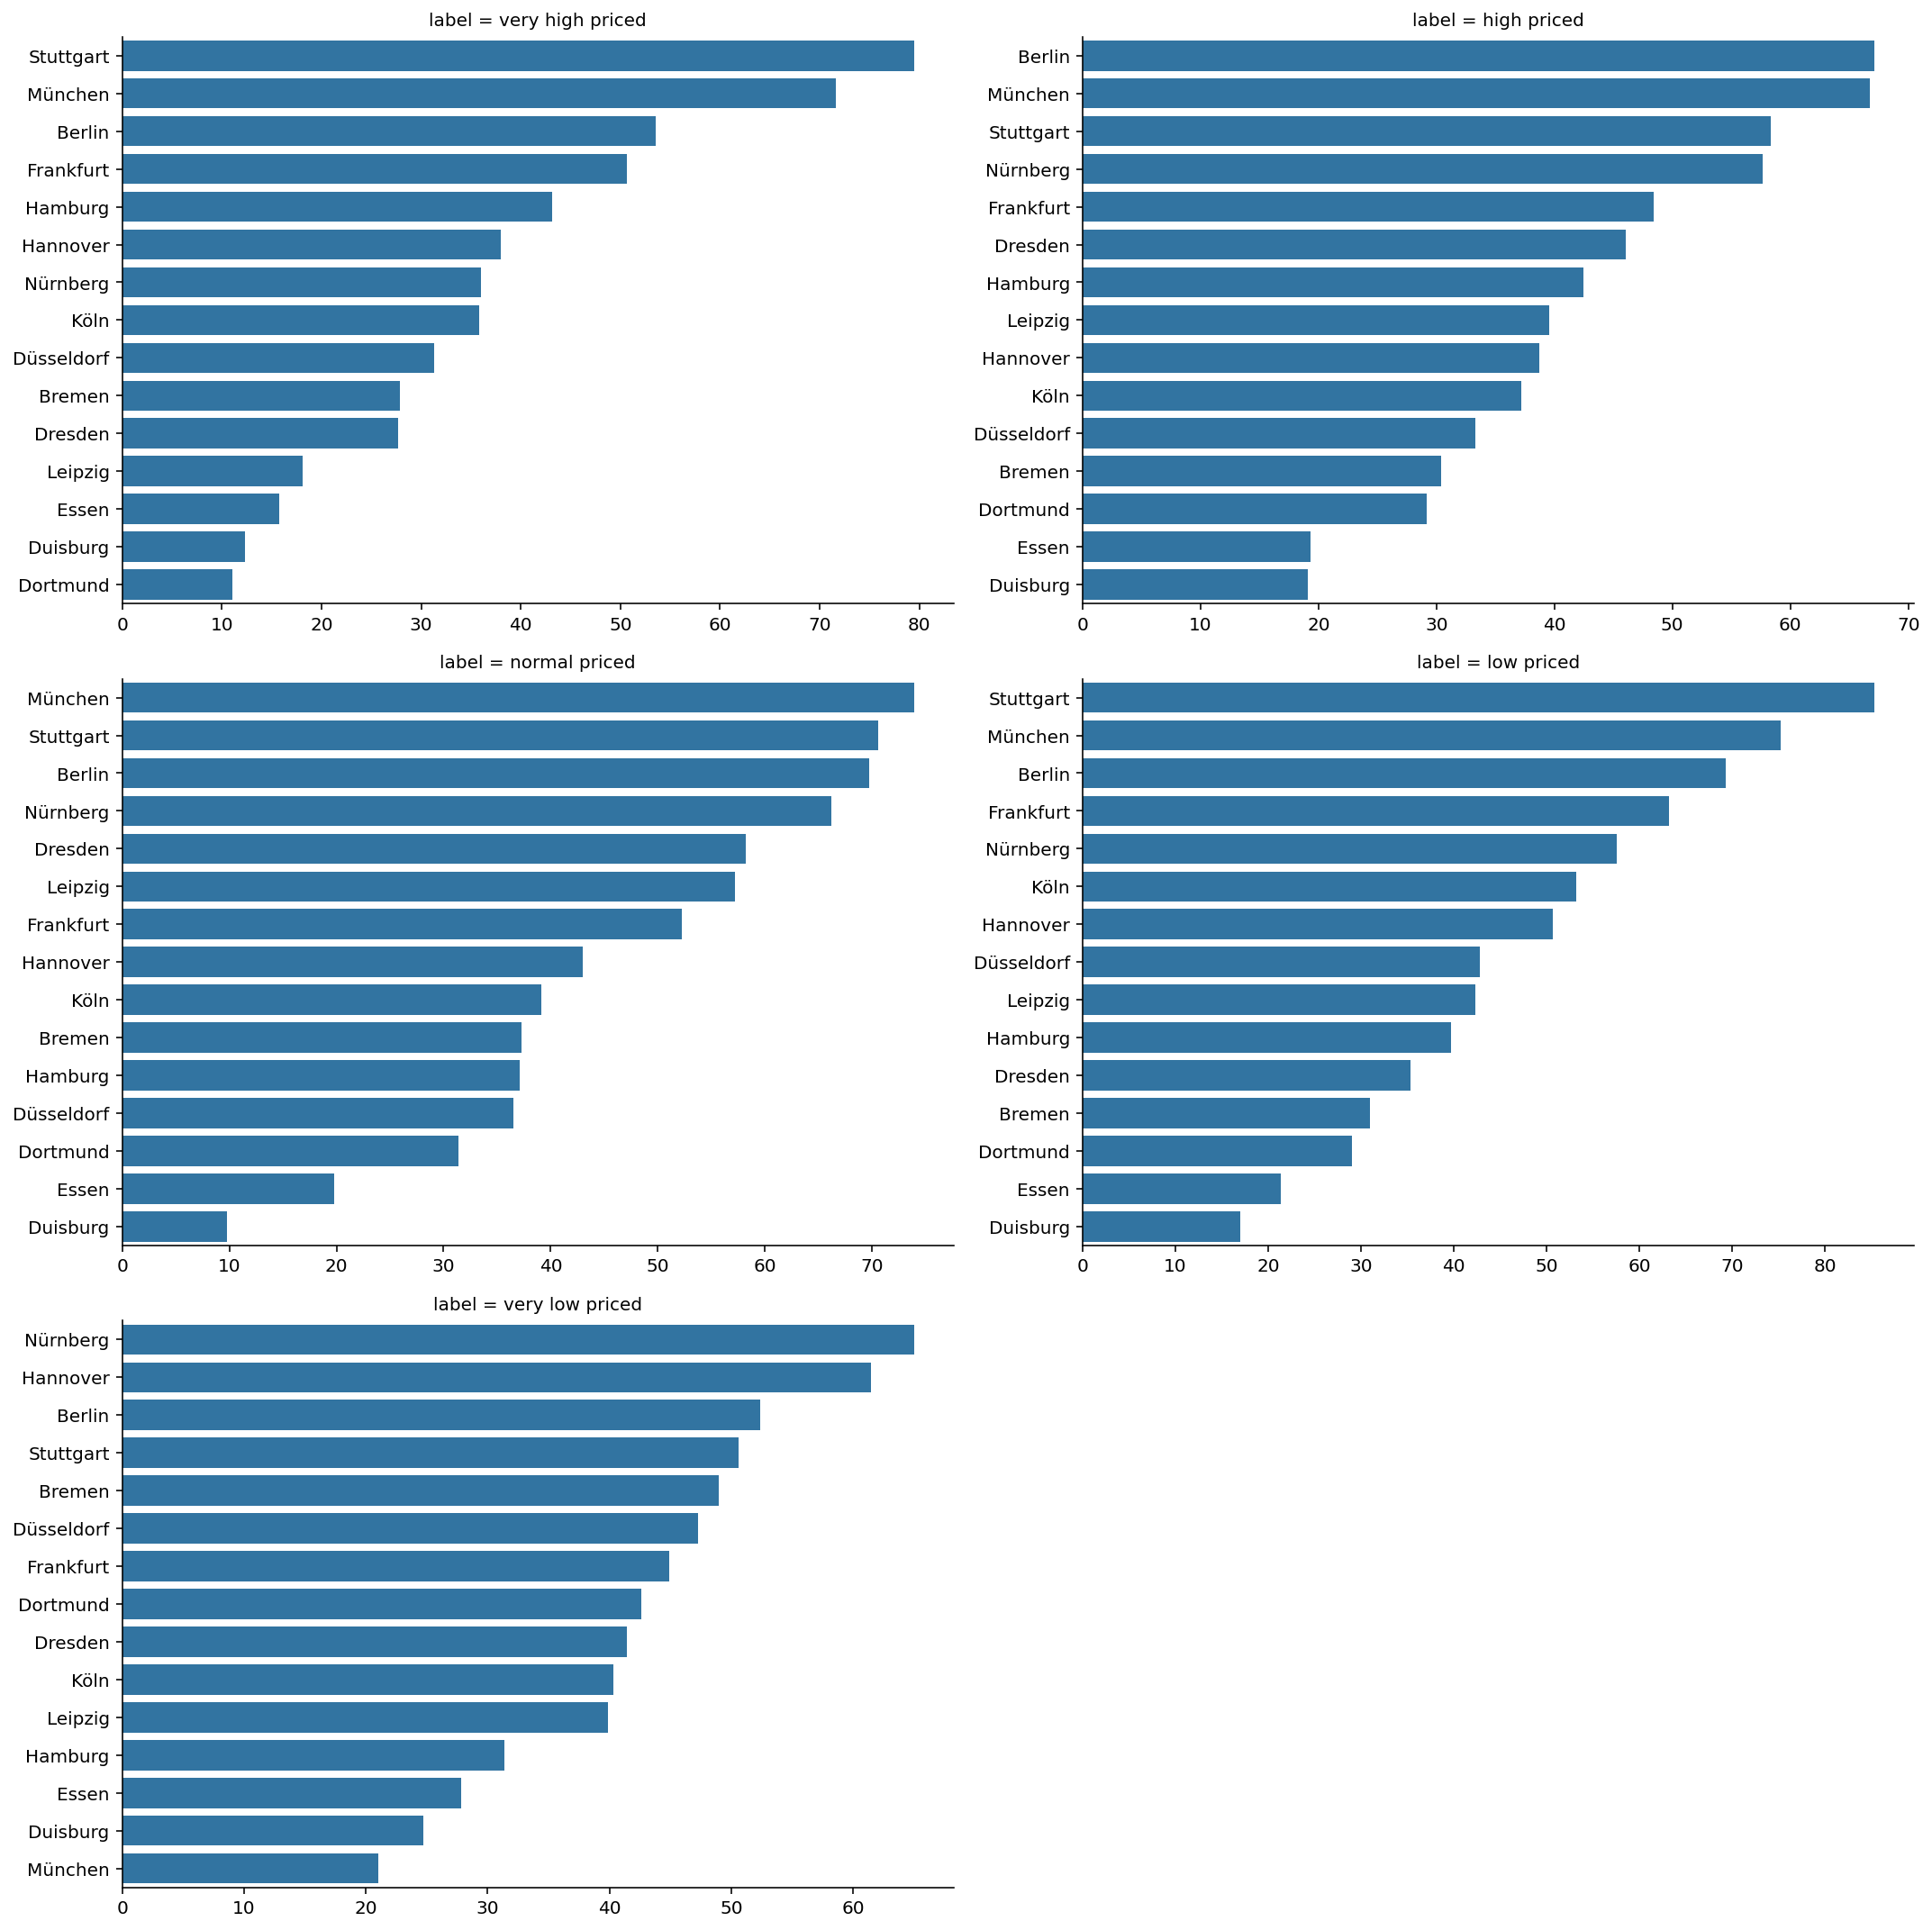

In [174]:
g = sns.FacetGrid(data=changes, col='label', col_wrap=2, sharey=False, sharex=False, col_order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], height=5, aspect=1.5)
plt.figure(figsize=(12,9))
g.map_dataframe(sns.barplot, x='percentual_change_rent_sqm', y='City')


In [50]:
changes

,City,label,percentual_change_rent_sqm
73,Nürnberg,very low priced,65.004288
69,Hannover,very low priced,61.468110
60,Berlin,very low priced,52.380301
74,Stuttgart,very low priced,50.630659
61,Bremen,very low priced,48.996552
...,...,...,...
5,Düsseldorf,high priced,33.300785
1,Bremen,high priced,30.423493
2,Dortmund,high priced,29.197777
6,Essen,high priced,19.320222


In [99]:
min_changes = changes.loc[changes.groupby(["label"])["percentual_change_rent_sqm"].idxmin()]
max_changes = changes.loc[changes.groupby(["label"])["percentual_change_rent_sqm"].idxmax()]

In [88]:
merged_min_max = min_changes.merge(max_changes, left_on='label', right_on='label', suffixes=['_min', '_max'])


In [109]:
min_changes['min_max'] = 'min'
max_changes['min_max'] = 'max'



In [136]:
min_changes

,City,label,percentual_change_rent_sqm,min_max
4,Duisburg,high priced,19.064745,min
19,Duisburg,low priced,16.976457,min
34,Duisburg,normal priced,9.760297,min
47,Dortmund,very high priced,11.093150,min
72,München,very low priced,20.988056,min


In [137]:
min_max = pd.concat([min_changes, max_changes], axis=0)

In [135]:
min_max.City = min_max.City + '_' + min_max.min_max



In [153]:
cities = min_max.City.values
min_max.sort_values(by=['min_max', 'label'], ascending=False)


,City,label,percentual_change_rent_sqm,min_max
72,München,very low priced,20.988056,min
47,Dortmund,very high priced,11.093150,min
34,Duisburg,normal priced,9.760297,min
19,Duisburg,low priced,16.976457,min
4,Duisburg,high priced,19.064745,min
73,Nürnberg,very low priced,65.004288,max
59,Stuttgart,very high priced,79.466327,max
42,München,normal priced,73.920523,max
29,Stuttgart,low priced,85.357795,max
0,Berlin,high priced,67.133752,max


In [154]:
cities=['Dortmund', 'Duisburg', 'Duisburg', 'Duisburg', 'München', 'Stuttgart', 'Berlin', 'München', 'Stuttgart', 'Nürnberg']

Text(0.5, 1.0, 'Minimum and maximum price changes of appartments and the corresponding cities')

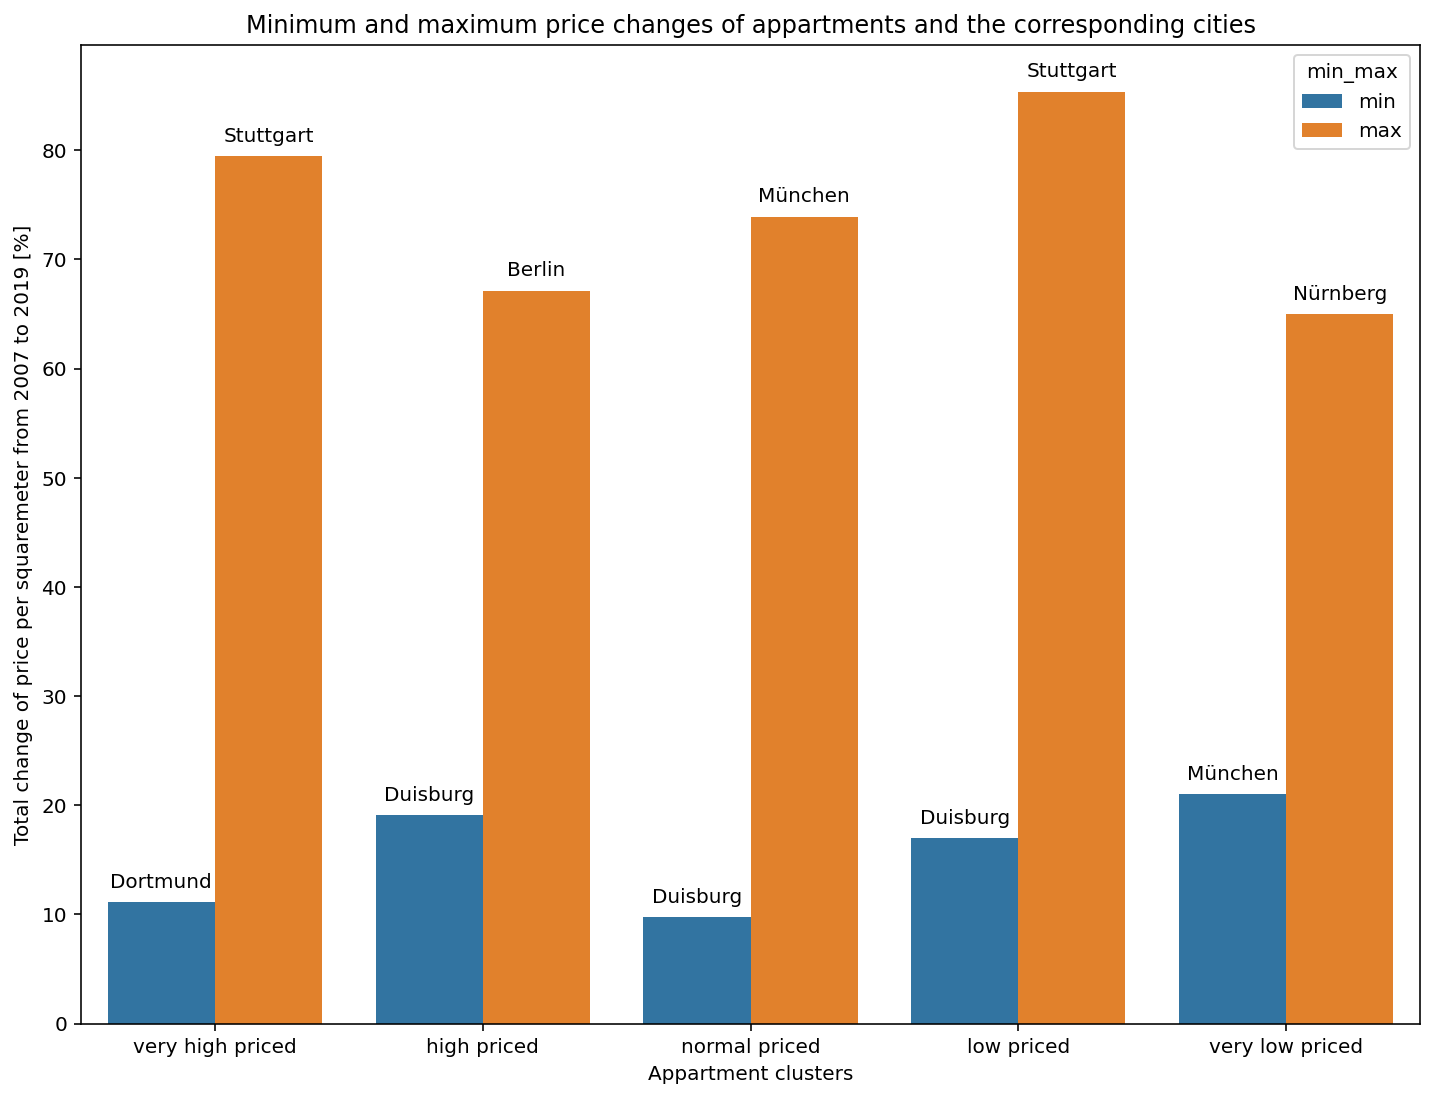

In [161]:
plt.figure(figsize=(12,9))
splot = sns.barplot(data=min_max, x='label', y='percentual_change_rent_sqm', hue='min_max', order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])
for i, p in enumerate(splot.patches):
    #print(cities[i], format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()))
    splot.annotate(cities[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Appartment clusters')
plt.ylabel('Total change of price per squaremeter from 2007 to 2019 [%]')
plt.title('Minimum and maximum price changes of appartments and the corresponding cities')

#format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())

In [ ]:
df.to_pickle('data/rent_clustering_done.pkl')

In [83]:
min_changes

,City,label,percentual_change_rent_sqm
4,Duisburg,high priced,19.064745
19,Duisburg,low priced,16.976457
34,Duisburg,normal priced,9.760297
47,Dortmund,very high priced,11.093150
72,München,very low priced,20.988056


In [164]:
134000 / 356 / 4

94.10112359550561